<a href="https://colab.research.google.com/github/fathima524/Data-handling-and-Visualization/blob/main/COVID_19_data_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
covid_df=pd.read_csv("/content/drive/MyDrive/dha project/covid_19_india.csv")

In [ ]:
covid_df.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [ ]:
print(covid_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB
None


# **PRE PROCESSING THE DATA**

In [ ]:
print(covid_df.isnull().sum())

Sno                         28
Date                        28
Time                        28
State/UnionTerritory        28
ConfirmedIndianNational     28
ConfirmedForeignNational    28
Cured                       28
Deaths                      28
Confirmed                   28
dtype: int64


In [ ]:
covid_df.dropna(inplace=True)

In [ ]:
print(covid_df.isnull().sum())

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64


In [ ]:
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"],inplace=True,axis=1)

In [ ]:
covid_df['Date'] =  pd.to_datetime(covid_df['Date'],format = '%Y-%m-%d')

In [ ]:
covid_df.rename(columns={'State/UnionTerritory':'Region'},inplace=True)

In [ ]:
print(covid_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15086 entries, 0 to 15085
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          15086 non-null  datetime64[ns]
 1   Region        15086 non-null  object        
 2   Cured         15086 non-null  float64       
 3   Deaths        15086 non-null  float64       
 4   Confirmed     15086 non-null  float64       
 5   Active Cases  15086 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 825.0+ KB
None


# **FINDING THE TOTAL NUMBER OF ACTIVE CASES**

In [ ]:
covid_df['Active Cases']=covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
print(covid_df.head(5))

        Date State/UnionTerritory  Cured  Deaths  Confirmed  Active Cases
0 2020-01-30               Kerala    0.0     0.0        1.0           1.0
1 2020-01-31               Kerala    0.0     0.0        1.0           1.0
2 2020-02-01               Kerala    0.0     0.0        2.0           2.0
3 2020-02-02               Kerala    0.0     0.0        3.0           3.0
4 2020-02-03               Kerala    0.0     0.0        3.0           3.0


CREATING A PIVOT TABLE

In [ ]:
statewise= pd.pivot_table(covid_df,values = ["Confirmed","Deaths","Cured","Date"],index="Region" , aggfunc = max)

In [ ]:
print(statewise)

                                          Confirmed      Cured   Deaths
Region                                                                 
Andaman and Nicobar Islands                  6674.0     6359.0     92.0
Andhra Pradesh                            1475372.0  1254291.0   9580.0
Arunachal Pradesh                           22462.0    19977.0     88.0
Assam                                      340858.0   290774.0   2344.0
Bihar                                      664115.0   595377.0   4039.0
Cases being reassigned to states             9265.0        0.0      0.0
Chandigarh                                  56513.0    48831.0    647.0
Chhattisgarh                               925531.0   823113.0  12036.0
Dadra and Nagar Haveli and Daman and Diu     9652.0     8944.0      4.0
Daman & Diu                                     2.0        0.0      0.0
Delhi                                     1402873.0  1329899.0  22111.0
Goa                                        138776.0   112633.0  

In [ ]:
statewise["Recovery Rate"]=statewise["Cured"]*100/statewise["Confirmed"]
statewise["Mortality Rate"]=statewise["Deaths"]*100/statewise["Confirmed"]
print(statewise)

                                          Confirmed      Cured   Deaths  \
Region                                                                    
Andaman and Nicobar Islands                  6674.0     6359.0     92.0   
Andhra Pradesh                            1475372.0  1254291.0   9580.0   
Arunachal Pradesh                           22462.0    19977.0     88.0   
Assam                                      340858.0   290774.0   2344.0   
Bihar                                      664115.0   595377.0   4039.0   
Cases being reassigned to states             9265.0        0.0      0.0   
Chandigarh                                  56513.0    48831.0    647.0   
Chhattisgarh                               925531.0   823113.0  12036.0   
Dadra and Nagar Haveli and Daman and Diu     9652.0     8944.0      4.0   
Daman & Diu                                     2.0        0.0      0.0   
Delhi                                     1402873.0  1329899.0  22111.0   
Goa                      

TOP 10 STATES WITH HIGH ACTIVE CASES

In [ ]:
top_10_active_cases=covid_df.groupby(by = 'Region').max()[['Active Cases']].sort_values(by = 'Active Cases',ascending= False ).reset_index()
print(top_10_active_cases)

                                      Region  Active Cases
0                                Maharashtra      701614.0
1                                  Karnataka      605515.0
2                                     Kerala      445692.0
3                              Uttar Pradesh      310783.0
4                                 Tamil Nadu      242929.0
5                                  Rajasthan      212753.0
6                             Andhra Pradesh      211554.0
7                                    Gujarat      148297.0
8                                West Bengal      131948.0
9                               Chhattisgarh      131245.0
10                                   Haryana      116867.0
11                                     Bihar      115152.0
12                            Madhya Pradesh      111366.0
13                                     Delhi      103424.0
14                                    Odisha       95743.0
15                                 Telangana       80695

<ipython-input-62-1216ca9a3257>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




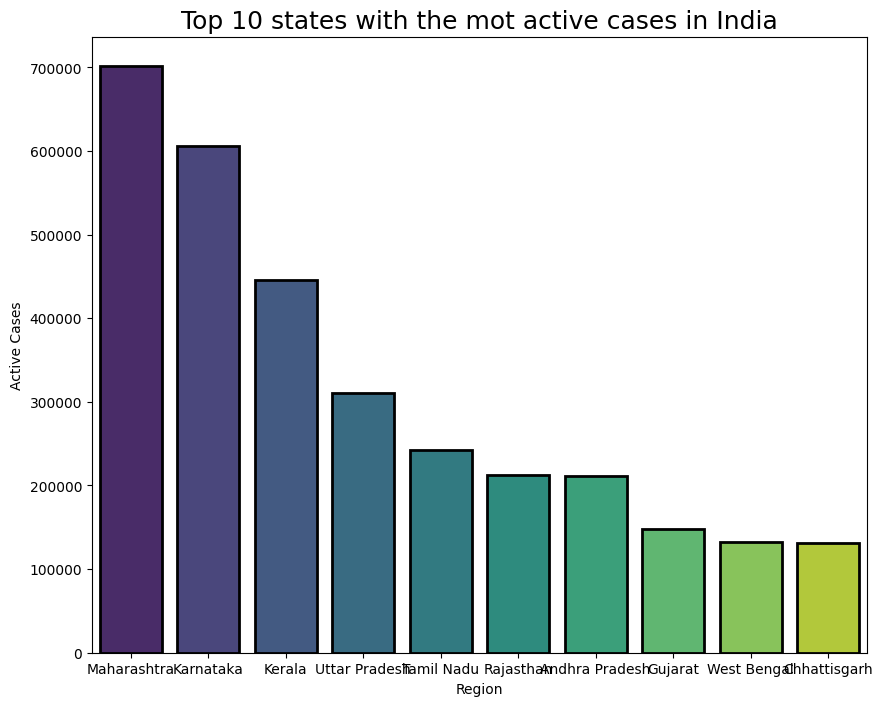

In [ ]:
fig=plt.figure(figsize=(10,8))
custom_palette = sns.color_palette("viridis", len(top_10_active_cases.iloc[:10]))
plt.title("Top 10 states with the mot active cases in India",size=18)
ax=sns.barplot(data= top_10_active_cases.iloc[:10], y = 'Active Cases' , x = 'Region', linewidth = 2, edgecolor = 'black',palette=custom_palette)


TOP 10 STATES WITH THE HIGHEST DEATH CASES

In [ ]:
top_10_deaths=covid_df.groupby(by = 'Region').max()[['Deaths']].sort_values(by = 'Deaths',ascending= False ).reset_index()
print(top_10_deaths)

                                      Region   Deaths
0                                Maharashtra  83777.0
1                                  Karnataka  22838.0
2                                      Delhi  22111.0
3                                 Tamil Nadu  18369.0
4                              Uttar Pradesh  18072.0
5                                West Bengal  13576.0
6                                     Punjab  12317.0
7                               Chhattisgarh  12036.0
8                             Andhra Pradesh   9580.0
9                                    Gujarat   9269.0
10                            Madhya Pradesh   7139.0
11                                 Rajasthan   7080.0
12                                   Haryana   6923.0
13                                    Kerala   6612.0
14                               Uttarakhand   5132.0
15                                 Jharkhand   4601.0
16                                     Bihar   4039.0
17                         J

<ipython-input-68-b39e964efa66>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




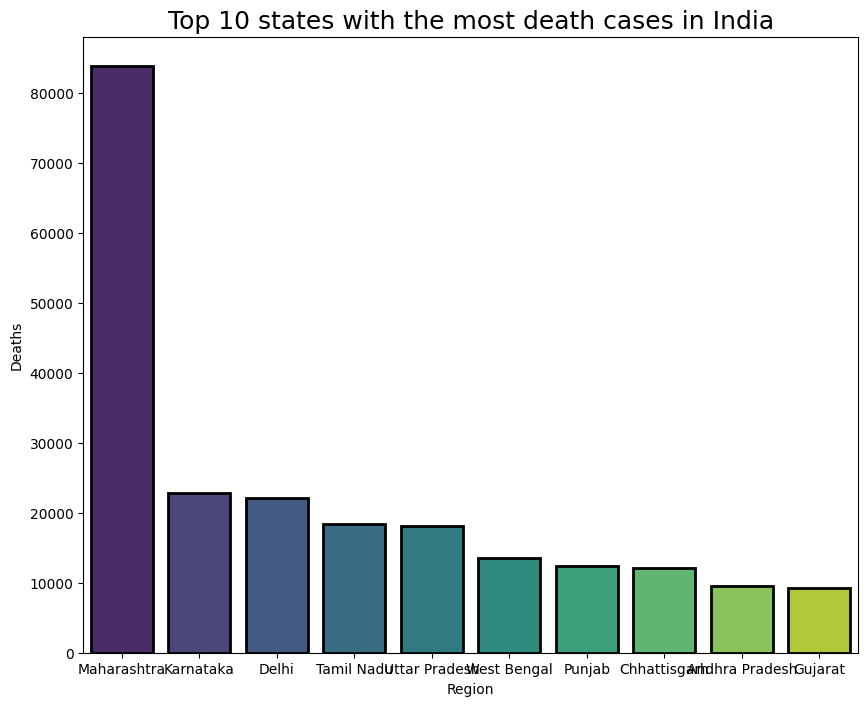

In [ ]:
fig=plt.figure(figsize=(10,8))
custom_palette = sns.color_palette("viridis", len(top_10_deaths.iloc[:10]))
plt.title("Top 10 states with the most death cases in India",size=18)
ax=sns.barplot(data= top_10_deaths.iloc[:10], y = 'Deaths' , x = 'Region', linewidth = 2, edgecolor = 'black',palette=custom_palette)

TOP 5 AFFECTED STATES IN INDIA : COVID-19 CASES GROWTH TREND


Text(0.5, 1.0, 'Top 5 affected states')

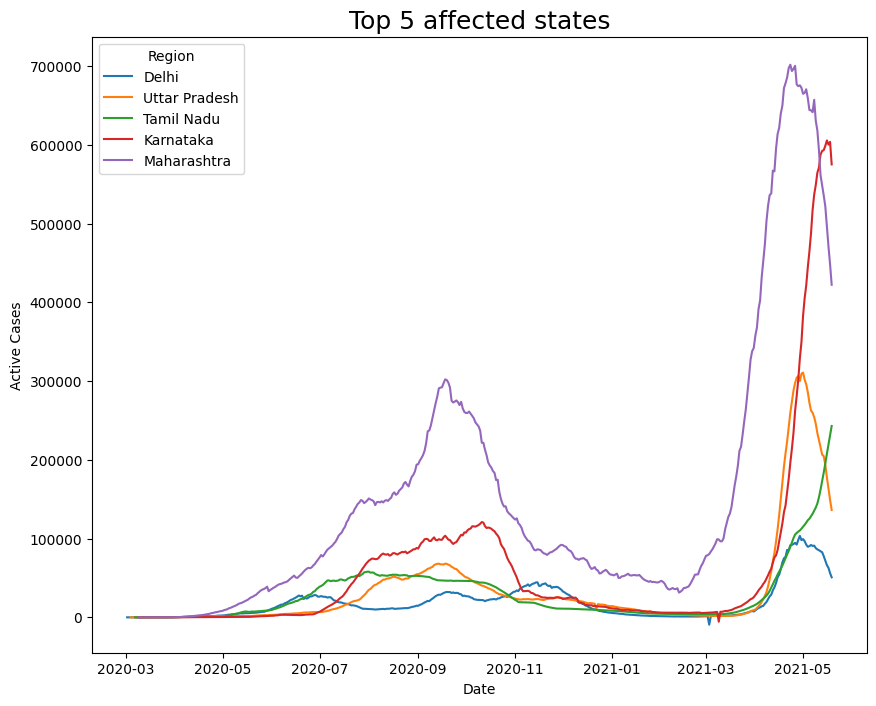

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = sns.lineplot(
    data=covid_df[covid_df["Region"].isin(["Maharashtra", "Karnataka", "Delhi", "Tamil Nadu", "Uttar Pradesh"])],
    x="Date",
    y="Active Cases",
    hue="Region",
)
ax.set_title("Top 5 affected states", size=18)

In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [5]:
covid_vaccine=pd.read_csv("/content/drive/MyDrive/dha project/covid_vaccine_statewise.csv")

In [6]:
covid_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [134]:
covid_vaccine.head(5)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [138]:
vaccination = covid_vaccine

MALE VS FEMALE VACCINATION

In [141]:
male = vaccination["Male(Individuals Vaccinated)"].sum()
female = vaccination["Female(Individuals Vaccinated)"].sum()
px.pie(names=["Male","Female"],values=[male,female],title="Male and Female Vaccination")